# Analisando dados da TV
<p>Este notebook é uma tradução do projeto proposto pelo <a href="https://www.datacamp.com/">DataCamp</a> no curso de Data Science with Python, onde podemos fazer uma breve visita à história do Super Bowl, que é o jogo final do campeonato da NFL (National Football League), a principal liga de futebol americano dos Estados Unidos, este momento decide o campeão da temporada. 

## 1. TV, halftime shows e o jogo

<p>Quer você goste ou não de futebol, o Super Bowl é um espetáculo. Sempre há algo que interesse alguém no festival que é o Super Bowl. Emoções nos blowouts, reviravoltas e discussões para os fãs do esporte. Existem também os anúncios ridiculamente caros, alguns hilários, outros angustiantes, instigantes e estranhos. Os halftimes trazem os maiores músicos do mundo, às vezes <a href="https://youtu.be/ZD1QrIe--_Y?t=14">montados em tigres mecânicos gigantes</a> (que particularmente é o meu predileto) ou <a href="https://youtu.be/mjrdywp5nyE?t=62">pulando do telhado do estádio</a>. Como eu disse, é um espetáculo, bebê! E neste notebook, vamos descobrir como alguns dos elementos deste show interagem entre si. Depois de explorar e limpar um pouco nossos dados, vamos responder a perguntas como:</p>
<ul>
<li>Quais são os maiores resultados de jogos?</li>
<li>Como o jogo afeta a audiência da televisão?</li>
<li>Como a audiência, as avaliações da TV e o custo do anúncio evoluíram ao longo do tempo?</li>
<li>Quem são os músicos mais presentes em termos de apresentações no halftime show?</li>
</ul>

<p><img src="https://img.ibxk.com.br/2015/03/10/10145216148664.jpg" alt="A esquerda, os tubarões roubam a cena">
<em><a href="https://www.flickr.com/photos/huntleypaton/16464994135/in/photostream/">A esquerda, os tubarões roubam a cena</a>. Katy Perry performando no Super Bowl XLIX. Photo by Huntley Paton. Attribution-ShareAlike 2.0 Generic (CC BY-SA 2.0).</em></p>


<p>O conjunto de dados que será usado foi <a href="https://en.wikipedia.org/wiki/Web_scraping">extraído</a> da Wikipedia. Ele é composto por três arquivos CSV, um com os <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">dados dos jogos</a>, outro com <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">dados da TV</a> e o último são os <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows">dados dos halftimes</a> para todos os 52 Super Bowls até 2018. Vamos dar uma olhada, usando display () em vez de print (), uma vez que sua saída é muito mais bonita nos Jupyter Notebooks.

In [11]:
# Importar a biblioteca Pandas
import pandas as pd

# Carregar os dados CSV em DataFrames
super_bowls = pd.read_csv('datasets/super_bowls.csv')
tv = pd.read_csv('datasets/tv.csv')
halftime_musicians = pd.read_csv('datasets/halftime_musicians.csv')

# Exibir as 5 primeiras linhas dos DataFrames
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Observando os problemas do conjunto de dados

<p>Para os dados do jogo do Super Bowl, podemos ver que o conjunto de dados aparece inteiro, exceto pelos valores ausentes nas colunas de quarterbacks (<code>qb_winner_2</code> and <code>qb_loser_2</code>), que faz sentido, considerando a maioria dos QBs iniciais do Super Bowl (<code>qb_winner_1</code> and <code>qb_loser_1</code>) jogam o jogo  por completo.</p>
<p>Pela inspeção visual dos dados da TV e dos músicos do halftime, há apenas um valor ausente exibido, mas chuto que há mais. O Super Bowl começou por volta de 1967, e as colunas mais granulares (como o número de músicas para músicos de intervalo) provavelmente não foram rastreadas de forma confiável ao longo do tempo. A Wikipedia é ótima, mas não é perfeita.</p>
<p>Uma inspeção com <code>.info()</code> nos DataFrames <code>tv</code> e <code>halftime_musicians</code> nos mostra que existem várias colunas com valores nulos.</p>

In [12]:
# Resumir os dados da TV
tv.info()

print('\n')

# Resumir os dados dos músicos do halftime
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

## 3. Distribuição de pontos
<p>Para os dados de TV, as seguintes colunas têm valores faltantes (e são muitos):</p>
<ul>
<li><code>total_us_viewers</code> (quantidade de espectadores dos EUA que assistiram pelo menos parte da transmissão)</li>
<li><code>rating_18_49</code> (% média de adultos norte-americanos de 18 a 49 anos que vivem em uma casa com uma TV que assistiam transmissão inteira)</li>
<li><code>share_18_49</code> (% média de adultos norte-americanos de 18 a 49 anos que vivem em uma casa com uma TV <i>em uso</i> que assistiam a toda a transmissão)</li>
</ul>
<p>Para os dados dos músicos do halftime, faltam números de canções executadas (<code>num_songs</code>) de cerca de um terço das apresentações.</p>
<p>Existem muitos motivos potenciais para esses valores ausentes. Os dados já foram rastreados? Foi perdido na história? O esforço de pesquisa para tornar esses dados completos vale a pena? Talvez. Assistir a todos os halftime shows do Super Bowl para obter a contagem das músicas seria muito divertido. Mas não temos tempo para fazer esse tipo de coisa agora! Vamos anotar onde o conjunto de dados não é perfeito e começar a descobrir alguns insights.</p>
<p>Podemos começar observando os pontos marcados de cada Super Bowl, visualizando a distribuição. Além de identificarmos os Super Bowls com as pontuações mais altas e mais baixas.</p>

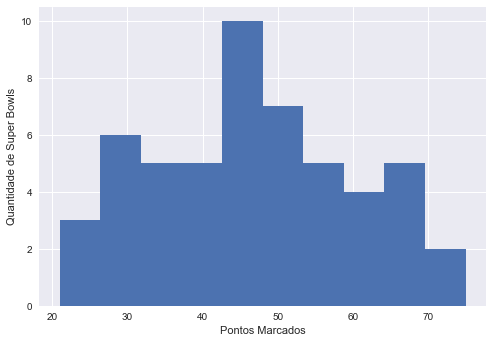

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [13]:
# Importar a biblioteca matplotlib e definir o estilo do plotting 
from matplotlib import pyplot as plt 
%matplotlib inline
plt.style.use('seaborn')

# Plotar um histograma dos pontos
plt.hist(super_bowls.combined_pts)
plt.xlabel('Pontos Marcados')
plt.ylabel('Quantidade de Super Bowls')
plt.show()

# Mostrar o Super Bowls com maiores e menores pontuações
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

## 4. Distribuição da diferença de pontos

<p>A maioria das pontuações estão em torno de 40-50 pontos, com os extremos sendo aproximadamente a mesma distância em direções opostas. Subindo para as pontuações mais altas, em 74 e 75, encontramos dois jogos com performances dominantes de quarterbacks. Um aconteceu recentemente no Super Bowl LII de 2018, onde Tom Brady, dos Patriots, perdeu para Nick Foles, dos Eagles de 41-33, resultando 74 pontos.</p>
<p>Descendo para as pontuações mais baixas combinadas, temos Super Bowl III e VII, onde as defesas foram fortes e dominaram o jogo. Também temos o Super Bowl IX em Nova Orleans em 1975, cuja pontuação de 16-6 e que, pode ser culpada pelo tempo cruel. O campo estava escorregadio por causa da chuva que caiu durante a noite e estava frio, cerca de 46°F (8°C), tornando difícil para os Steelers e Vikings trabalharem na ofensiva. Este foi o segundo Super Bowl mais frio de todos os tempos e o último a ser disputado com um clima cruel em mais de 30 anos.</p>
<p><em>UPDATE: No Super Bowl LIII em 2019, os Patriots e Rams quebraram o recorde de menor pontuação do Super Bowl com uma pontuação de 16 pontos (13-3 para os Patriots).</em></p>
<p>Agora, vamos dar uma olhada na <em>diferença</em> de pontos.</p>

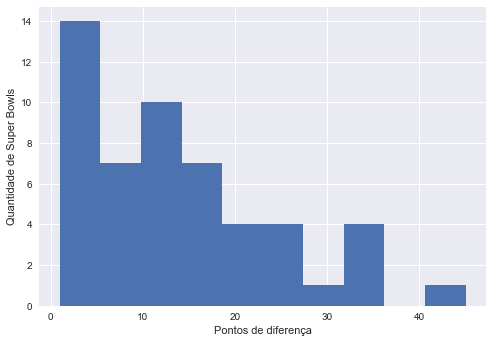

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [14]:
# Plotar um histograma de diferenças de pontos
plt.hist(super_bowls.difference_pts)
plt.xlabel('Pontos de diferença')
plt.ylabel('Quantidade de Super Bowls')
plt.show()

# Mostrar os jogos com maiores e menores blowouts
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] > 35])

## 5. Os blowouts geram menos audiência?
<p>A grande maioria dos Super Bowls são jogos disputados. Faz sentido. Ambas as equipes provavelmente merecem se eles chegaram até aqui. O jogo mais acirrado de todos os tempos foi quando o Buffalo Bills perdeu para o New York Giants por 1 ponto em 1991, que foi mais lembrado pela tentativa de arremesso perdida de último segundo de Scott Norwood que saiu <em><a href="https://www.youtube.com/watch?v=RPFZCGgjDSg">pela direita</a></em>, dando início a quatro derrotas consecutivas do Bills no Super Bowl. Pobre Scott. A maior discrepância de pontos de todos os tempos foi de <b>45 pontos</b>(!), Onde o Hall of Famer Joe Montana levou o San Francisco 49ers à vitória em 1990, um ano antes do jogo mais disputado de todos os tempos.</p>
<p>Lembro-me de assistir os Seahawks esmagarem os Broncos por 35 pontos (43-8) em 2014, o que foi uma experiência chata na minha opinião. Quando o jogo não é tão acirrado é claro que vamos mudar de canal no final do terceiro tempo. Vamos combinar nossos dados de jogos e de TV para ver se isso realmente é um fenômeno universal. Grandes blowouts significam perda de audiência? Podemos representar graficamente a <a href="https://en.wikipedia.org/wiki/Nielsen_ratings">household share</a> <em>(porcentagem média de domicílios dos EUA com uma TV em uso que assistiam a transmissão inteira)</em> os pontos de diferença para descobrirmos.</p>

<AxesSubplot:xlabel='difference_pts', ylabel='share_household'>

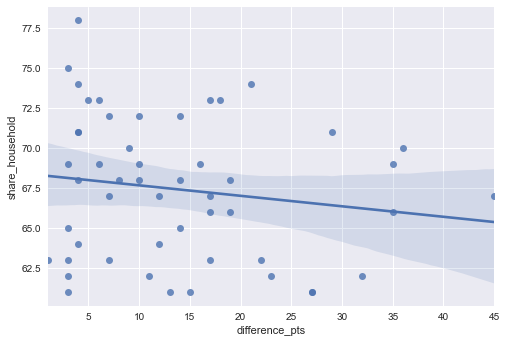

In [15]:
# Juntar os dados de jogos e TV, filtrando a partir do SB I porque ele está dividido
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Importar seaborn
import seaborn as sns

# Criar um gráfico de dispersão com um ajuste de modelo de regressão linear
sns.regplot(x = games_tv['difference_pts'], y= games_tv['share_household'], data=games_tv)

## 6. A audiência e indústria de publicidade ao longo do tempo
<p>A linha de regressão inclinada para baixo com um intervalo de confiança de 95% para essa regressão <i>sugerem</i> que abandonar o jogo se houver um blwout é comum. Embora corresponda à nossa intuição, devemos aceitá-lo com cautela porque a relação linear nos dados é fraca devido ao tamanho da nossa amostra, que é pequena (52 jogos).</p>
<p>Independentemente da pontuação, aposto que o que a maioria das pessoas esperam é o halftime, o que é uma boa notícia para as redes de TV e anunciantes. Atualmente, um anúncio de 30 segundos custa cerca de <a href="https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1">$5 milhões</a>, mas será que sempre foi assim? E qual é a tendência do número de espectadores e a audiência das famílias em relação ao custo do anúncio? Podemos descobrir isso usando gráficos de linha que compartilham um eixo x nomeado como "Super Bowl".</p>

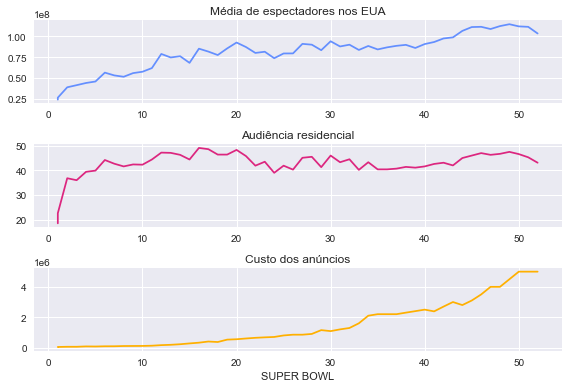

In [16]:
# Criar uma figura com subplot 3x1 e ative a subplot superior 
plt.subplot(3, 1, 1)
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], color='#648FFF')
plt.title('Média de espectadores nos EUA')

# Ativar o segundo subplot
plt.subplot(3, 1, 2)
plt.plot(tv['super_bowl'], tv['rating_household'], color='#DC267F')
plt.title('Audiência residencial')

# Ativar o último subplot
plt.subplot(3, 1, 3)
plt.plot(tv['super_bowl'], tv['ad_cost'], color='#FFB000')
plt.title('Custo dos anúncios')
plt.xlabel('SUPER BOWL')

# Por último, ajeitar o espaço entre os subplots
plt.tight_layout()

## 7. Os halftime shows nem sempre foram tão bons
<p>Podemos ver que o número de telespectadores aumentou antes dos custos dos anúncios. Talvez porque as redes não tivessem muito conhecimento de dados e demoraram a perceber? Faz sentido, já que DataCamp não existia naquela época.</p>
<p>Outra hipótese é: talvez os programas do intervalo não fossem tão bons nos primeiros anos? O espetáculo moderno do Super Bowl tem muito a ver com o prestígio cultural das grandes atuações no palco do halftime. Dei uma vasculhada no YouTube e descobri que os antigos não estavam a altura dos padrões de hoje. Temos aqui alguns infratores:</p>
<ul>
<li><a href="https://youtu.be/6wMXHxWO4ns?t=263">Super Bowl XXVI</a> em 1992: Um rap de Frosty The Snowman interpretado por crianças.</li>
<li><a href="https://www.youtube.com/watch?v=PKQTL1PYSag">Super Bowl XXIII</a> em 1989: Um imitador de Elvis que fazia truques de mágica e nem mesmo cantava uma música de Elvis.</li>
<li><a href="https://youtu.be/oSXMNbK2e98?t=436">Super Bowl XXI</a> em 1987: O sapateado dos pôneis. (Ok, isso é realmente genial!)</li>
</ul>
<p>Acontece que a performance de Michael Jackson no Super Bowl XXVII, um dos eventos mais assistidos na história da TV americana, foi quando a NFL percebeu o valor do tempo na TV a partir do Super Bowl e decidiu que precisava assinar grandes nomes a partir de então. Os shows do intervalo antes de MJ não foram tão impressionantes, é possível perceber isso filtrando nossos dados de <code>halftime_musician</code>.</p>

In [17]:
# Exibir todos os músicos do halftime até o Super Bowl XXVII (incluindo-o)
halftime_musicians[halftime_musicians.super_bowl <= 27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


## 9. Quem cantou mais músicas no halftime show?
<p>O mundialmente famoso <a href="https://www.youtube.com/watch?v=RL_3oqpHiDg">Grambling State University Tiger Marching Band</a> leva a coroa com seis aparições. Beyoncé, Justin Timberlake, Nelly e Bruno Mars são os únicos músicos pós-Y2K com mais participações (duas cada).</p>
<p>Pelas nossas inspeções anteriores, a coluna <code>num_songs</code> tem muitos valores faltantes:</p>
<ul>
<li>Muitas bandas universitárias não possuem <code>num_songs</code>.</li>
<li>Com músicos, os dados faltantes começam a aparecer no Super Bowl XX.</li>
</ul>
<p>Vamos filtrar as bandas universitárias da coluna <code>halftime_musicians</code> retirando os músicos com a palavra "Marching" e a palavra "Spirit" (uma nomenclatura comum para as bandas universitárias é "Spirit of [alguma coisa]"). Em seguida, filtraremos o Super Bowls após o Super Bowl XX para resolver o problema de dados faltantes, e aí <em>então</em> veremos quem tem o maior número de músicas.</p>

<p style="text-align: right; font-size:12px">Ok, aqui eu (Raquel), preciso abrir um parenteses. Já pensou que louco seria a charanga tocar na final do campeonato brasileiro de futebol? DOIDEIRA!</p>

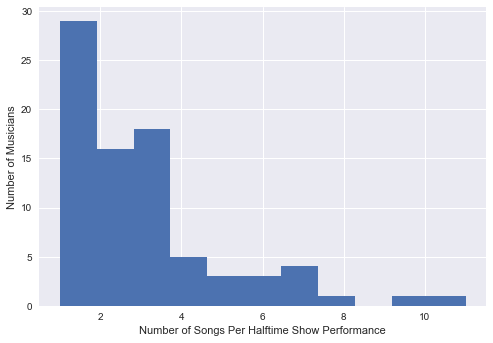

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [18]:
# Retirar as bandas universitárias
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plotar um histograma com a quantidade de músicas por performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Ordenar os músicos (sem banda) por número de músicas apresentadas
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...e mostrar o top 15
display(no_bands.head(15))

## 10. Conclusão 
<p>Portanto, a maioria dos músicos que não fazem parte da banda toca de 1 a 3 músicas por show do intervalo. É importante observar que a duração do show do intervalo é fixa (cerca de 12 minutos), então as músicas por apresentação podem ser vistas como uma medida de quantas músicas de sucesso você tem. JT explodiu em 2018, uau. 11 músicas! Diana Ross vem em segundo lugar com 10 em seu medley em 1996.</p>
<p>Neste notebook, carregamos, limpamos e, em seguida, exploramos os dados do jogo do Super Bowl, da televisão e do haltime show. Visualizamos as distribuições de pontos, diferenças de pontos e performances de show no intervalo usando histogramas.</p>
<p>Este ano, o grande jogo está mais próximo do que você imagina. Quem você acha que vai ganhar o Super Bowl LIII?</p>
<p><em>UPDATE: <a href="https://en.wikipedia.org/wiki/Super_Bowl_LIII">Spoiler alert</a>.</em></p>

In [19]:
# Semifinalistas de 2018-2019 
patriots = 'New England Patriots!'
rams = 'Los Angeles Rams!'

# Quem você acha que ganhará o Super Bowl LIII?
super_bowl_LIII_winner = patriots
print('O campeão do Super Bowl LIII será o', super_bowl_LIII_winner)

O campeão do Super Bowl LIII será o New England Patriots!
